In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

#Anscombe's Quartet

Demo of Anscombe's quartet in Python
Prints the return values from linregress to show that they're all identical
https://en.wikipedia.org/wiki/Anscombe's_quartet

Kudos: https://gist.github.com/endolith/3299951

0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.816 0.002 0.118
0.500 3.00 0.817 0.002 0.118


[0, 20, 0, 14]

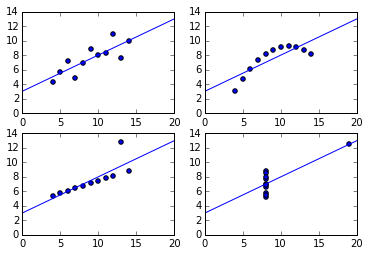

In [2]:
from matplotlib.pyplot import subplot, scatter, plot, axis, show
from scipy.stats import linregress
 
x1 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
 
x2 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
 
x3 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
 
x4 = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
 
xmax = 20
ymax = 14
 
ax1 = subplot(2, 2, 1)
scatter(x1, y1)
slope, intercept, r_value, p_value, std_err = linregress(x1, y1)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
 
subplot(2, 2, 2, sharex=ax1, sharey=ax1)
scatter(x2, y2)
slope, intercept, r_value, p_value, std_err = linregress(x2, y2)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
 
subplot(2, 2, 3, sharex=ax1, sharey=ax1)
scatter(x3, y3)
slope, intercept, r_value, p_value, std_err = linregress(x3, y3)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
 
subplot(2, 2, 4, sharex=ax1, sharey=ax1)
scatter(x4, y4)
slope, intercept, r_value, p_value, std_err = linregress(x4, y4)
plot([0, xmax], [intercept, slope * xmax + intercept])
print("{0:.3f} {1:.2f} {2:.3f} {3:.3f} {4:.3f}".format(slope, intercept, r_value, p_value, std_err))
 
axis([0, xmax, 0, ymax])


#Linear regression, example 1

##Exercise:  change noise level and residual distribution

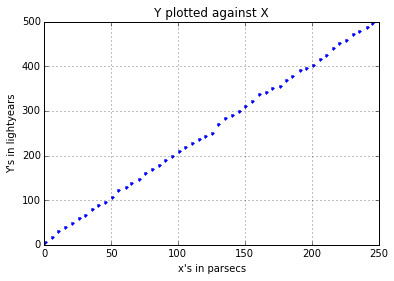

Your x is 10.0 parsecs, that's going to mean a y of about 27.7 lightyears.
The residual error is 41752.85.
Var(X) = 5309.42.


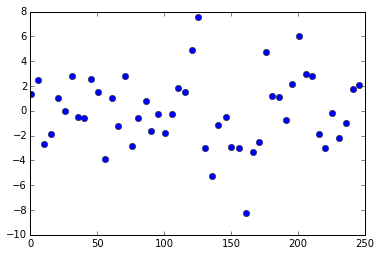

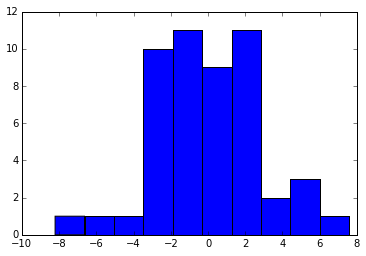

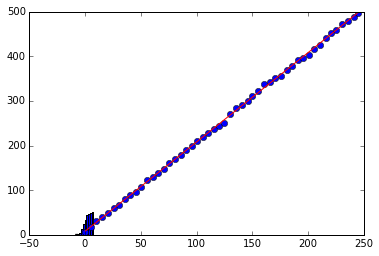

In [3]:
num_points = 50
X = 5 * np.arange(num_points) + np.random.random_sample(num_points)
y = 7 + 2 * X + 3 * np.random.normal(0, 1, num_points)

plt.title('Y plotted against X')
plt.xlabel("x's in parsecs")
plt.ylabel("Y's in lightyears")
plt.plot(X, y, 'b.')
plt.grid(True)
plt.show()

from sklearn.linear_model import LinearRegression
Xsk = [[x] for x in X]
Ysk = [[x] for x in y]
model = LinearRegression()
model.fit(Xsk, Ysk)
# All estimators in scikit-learn implement fit() and predict().
print("Your x is {x:.1f} parsecs, that's going to mean a y of about {y:.1f} lightyears.".format(
    x=10, y=model.predict(10)[0][0]))

# Compute residual sum of squares.
print("The residual error is {err:.2f}.".format(
    err=np.mean((model.predict(Xsk) - y) **2)))
print("Var(X) = {var:.2f}.".format(
    var=np.var(X, ddof=1)))

# Cf. also:
model.coef_
model.intercept_

residuals_sk = [model.predict(Xsk) - Ysk][0]
# or
residuals = [x[0] for x in [model.predict(Xsk) - Ysk][0]]

# Now plot the residuals
plt.plot(X, residuals, 'bo')
plt.show()

# Now histogram the residuals
plt.hist(residuals, bins=10)
plt.show()

plt.hist(residuals, bins=10, cumulative=True)

# Exercise: Do this with 500 or 5000 samples and play with plotting functions..
# Exercise: Increase the noise.  Try a different noise (residual) distribution.
plt.plot(X, y, 'bo')
x_points = np.linspace(min(X), max(X), num=num_points)
y_points = [model.intercept_[0] + model.coef_[0] * x
            for x in x_points]
plt.plot(x_points, y_points, 'r-')


#Linear vs Logistic Regression

##Mostly to show linear vs logistic regression

Shown in the plot is how the logistic regression would, in this
synthetic dataset, classify values as either 0 or 1,
i.e. class one or two, using the logit-curve.

(-4, 10)

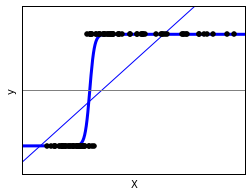

In [4]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))

loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='blue', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(())
plt.yticks(())
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)


#Diabetes

Simple regression example, more a reminder
that sklearn comes with cool data sets to play with.

Exercise: look
in the diabetes data and visualize / separate / predict something else


Linear Regression Example
This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.


Coefficients: 
 [ 938.23786125]
Residual sum of squares: 2548.07
Variance score: 0.47


([], <a list of 0 Text yticklabel objects>)

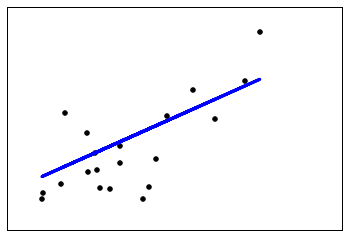

In [5]:
"""
=========================================================
Linear Regression Example
=========================================================
This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.

"""
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis]
diabetes_X_temp = diabetes_X[:, :, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())


#Confidence, using numpy (the hard way)

[None, None, None, None]

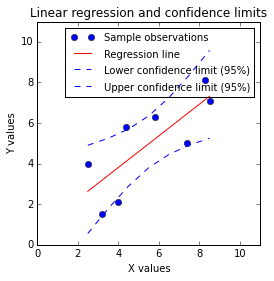

In [6]:
# linfit.py - example of confidence limit calculation for linear regression fitting.

# References: 
# - Statistics in Geography by David Ebdon (ISBN: 978-0631136880)
# - Reliability Engineering Resource Website: 
# - http://www.weibull.com/DOEWeb/confidence_intervals_in_simple_linear_regression.htm
# - University of Glascow, Department of Statistics:
# - http://www.stats.gla.ac.uk/steps/glossary/confidence_intervals.html#conflim

# Kudos:
#  https://www.students.ncl.ac.uk/tom.holderness/downloads/linfit.py

import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.array([4.0,2.5,3.2,5.8,7.4,4.4,8.3,8.5])
y = np.array([2.1,4.0,1.5,6.3,5.0,5.8,8.1,7.1])

# fit a curve to the data using a least squares 1st order polynomial fit
z = np.polyfit(x,y,1)
p = np.poly1d(z)
fit = p(x)

# get the coordinates for the fit curve    
c_y = [np.min(fit),np.max(fit)]
c_x = [np.min(x),np.max(x)]

# predict y values of origional data using the fit
p_y = z[0] * x + z[1] 

# calculate the y-error (residuals)
y_err = y -p_y 

# create series of new test x-values to predict for
p_x = np.arange(np.min(x),np.max(x)+1,1)

# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)			# mean of x
n = len(x)				# number of samples in origional fit
t = 2.31				# appropriate t value (where n=9, two tailed 95%)
s_err = np.sum(np.power(y_err,2))	# sum of the squares of the residuals

confs = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/
			((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))

# now predict y based on test x-values
p_y = z[0]*p_x+z[0]

# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - abs(confs)
upper = p_y + abs(confs)

# set-up the plot
plt.axes().set_aspect('equal')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Linear regression and confidence limits')

# plot sample data
plt.plot(x,y,'bo',label='Sample observations')

# plot line of best fit
plt.plot(c_x,c_y,'r-',label='Regression line')

# plot confidence limits
plt.plot(p_x,lower,'b--',label='Lower confidence limit (95%)')
plt.plot(p_x,upper,'b--',label='Upper confidence limit (95%)')

# set coordinate limits
plt.xlim(0,11)
plt.ylim(0,11) 

# configure legend
plt.legend(loc=0)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=10)


#Confidence using scipy, a bit easier

Summary: a=1.0978+/-0.3326, b=0.0220+/-0.0296
Confidence intervals: ci_a=(0.7652 - 1.4304), ci_b=(-0.0076 - 0.0516)
Residuals: variance = 0.0470, standard deviation = 0.2167
alpha = 0.010, tval = 2.8314, df=21


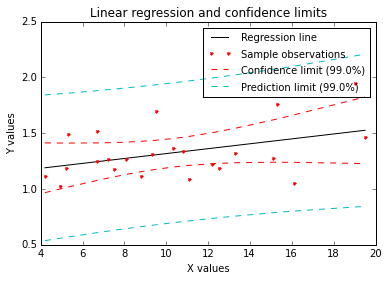

Example: x = 1.0+/-0.6854042823203418 => se_fit = 0.1079, se_predict = 0.24208


In [7]:
# License: Creative Commons Zero (almost public domain) http://scpyce.org/cc0
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

def fitLine(x, y, alpha=0.05, newx=[]):
    ''' Fit a curve to the data using a least squares 1st order polynomial fit '''
    
    # Summary data
    n = len(x)			   # number of samples     
    
    Sxx = np.sum(x**2) - np.sum(x)**2/n
    Sxy = np.sum(x*y) - np.sum(x)*np.sum(y)/n    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Linefit
    b = Sxy/Sxx
    a = mean_y - b*mean_x
    
    # Residuals
    fit = lambda xx: a + b*xx    
    residuals = y - fit(x)
    
    var_res = np.sum(residuals**2)/(n-2)
    sd_res = np.sqrt(var_res)
    
    # Confidence intervals
    se_b = sd_res/np.sqrt(Sxx)
    se_a = sd_res*np.sqrt(np.sum(x**2)/(n*Sxx))
    
    df = n-2                            # degrees of freedom
    tval = ss.t.isf(alpha/2., df) 	    # appropriate t value
    
    ci_a = a + tval*se_a*np.array([-1,1])
    ci_b = b + tval*se_b*np.array([-1,1])

    # create series of new test x-values to predict for
    npts = 100
    px = np.linspace(np.min(x),np.max(x),num=npts)
    
    se_fit     = lambda x: sd_res * np.sqrt(  1./n + (x-mean_x)**2/Sxx)
    se_predict = lambda x: sd_res * np.sqrt(1+1./n + (x-mean_x)**2/Sxx)
    
    print('Summary: a={0:5.4f}+/-{1:5.4f}, b={2:5.4f}+/-{3:5.4f}'.format(a,tval*se_a,b,tval*se_b))
    print('Confidence intervals: ci_a=({0:5.4f} - {1:5.4f}), ci_b=({2:5.4f} - {3:5.4f})'.format(ci_a[0], ci_a[1], ci_b[0], ci_b[1]))
    print('Residuals: variance = {0:5.4f}, standard deviation = {1:5.4f}'.format(var_res, sd_res))
    print('alpha = {0:.3f}, tval = {1:5.4f}, df={2:d}'.format(alpha, tval, df))
    
    # Return info
    ri = {'residuals': residuals, 
          'var_res': var_res,
          'sd_res': sd_res,
          'alpha': alpha,
          'tval': tval,
          'df': df}
    
    plt.figure()

    plt.plot(px, fit(px),'k', label='Regression line')
    plt.plot(x,y,'r.', label='Sample observations')

    x.sort()
    limit = (1-alpha)*100
    plt.plot(x, fit(x)+tval*se_fit(x), 'r--', label='Confidence limit ({0:.1f}%)'.format(limit))
    plt.plot(x, fit(x)-tval*se_fit(x), 'r--')

    plt.plot(x, fit(x)+tval*se_predict(x), 'c--', label='Prediction limit ({0:.1f}%)'.format(limit))
    plt.plot(x, fit(x)-tval*se_predict(x), 'c--')

    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Linear regression and confidence limits')

    # configure legend
    plt.legend(loc=0)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=10)

    # show the plot
    plt.show()

    if newx != []:
        try:
            newx.size
        except AttributeError:
            newx = np.array([newx])
    
        print('Example: x = {0}+/-{1} => se_fit = {2:5.4f}, se_predict = {3:6.5f}'\
        .format(newx[0], tval*se_predict(newx[0]), se_fit(newx[0]), se_predict(newx[0])))
        
        newy = (fit(newx), fit(newx)-se_predict(newx), fit(newx)+se_predict(newx))
        return (a,b,(ci_a, ci_b), ri, newy)
    else:
        return (a,b,(ci_a, ci_b), ri)
    
if __name__ == '__main__':
    # example data
    x = np.array([15.3, 10.8, 8.1, 19.5, 7.2, 5.3, 9.3, 11.1, 7.5, 12.2,
                    6.7, 5.2, 19.0, 15.1, 6.7, 8.6, 4.2, 10.3, 12.5, 16.1, 
                    13.3, 4.9, 8.8, 9.5])
    y = np.array([1.76, 1.34, 1.27, 1.47, 1.27, 1.49, 1.31, 1.09, 1.18, 
                    1.22, 1.25, 1.19, 1.95, 1.28, 1.52, np.nan, 1.12, 1.37, 
                    1.19, 1.05, 1.32, 1.03, 1.12, 1.70])
                      
    goodIndex = np.invert(np.logical_or(np.isnan(x), np.isnan(y)))
    (a,b,(ci_a, ci_b), ri,newy) = fitLine(x[goodIndex],y[goodIndex], alpha=0.01,newx=np.array([1,4.5]))  


#Confidence, using seaborn, the easy way.

Also an introduction to seaborn.

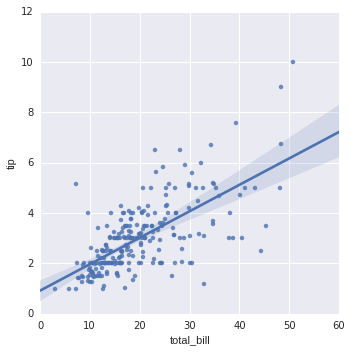

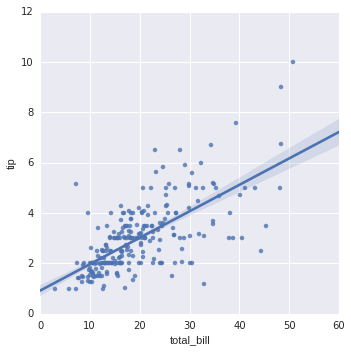

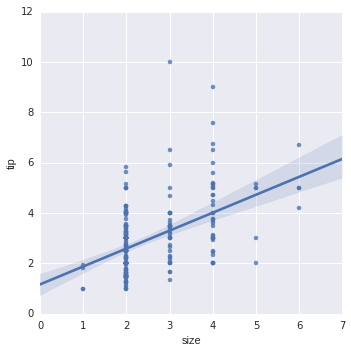

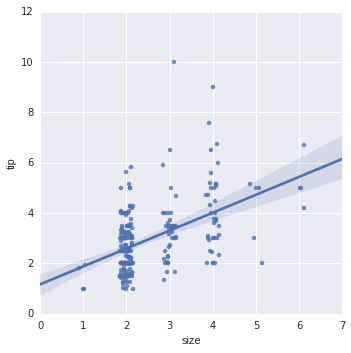

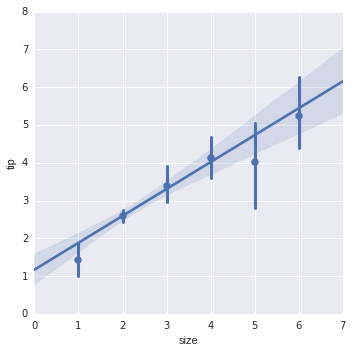

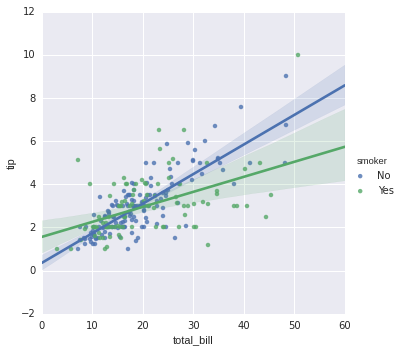

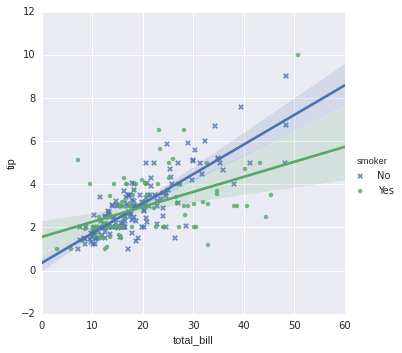

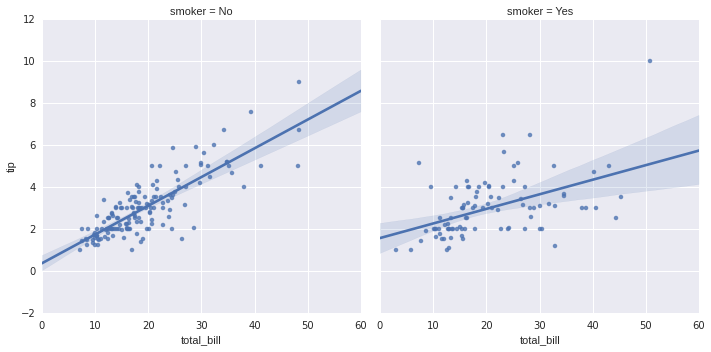

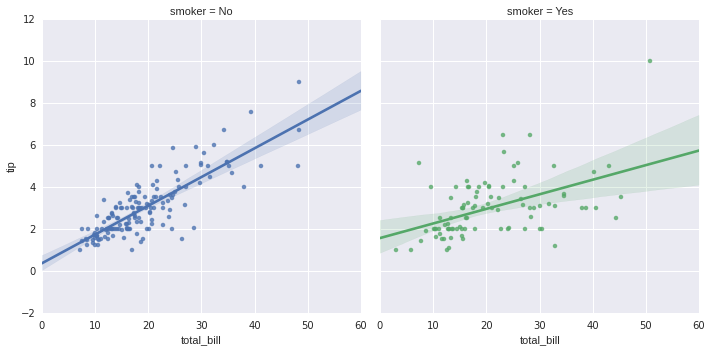

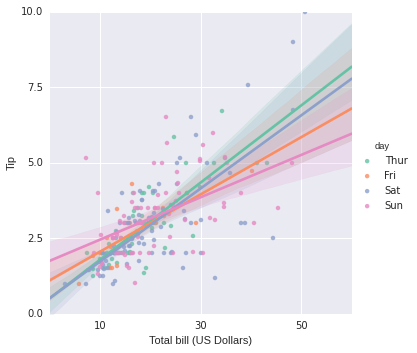

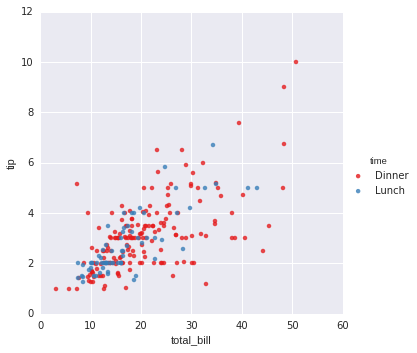

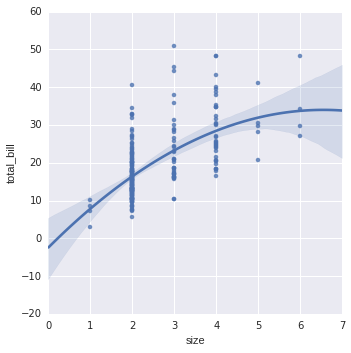

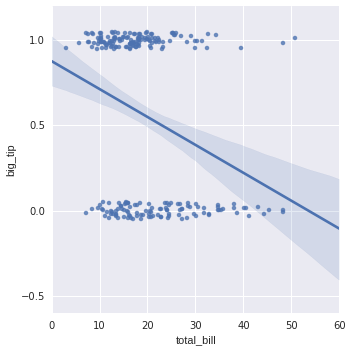

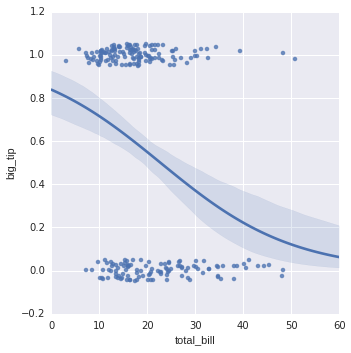

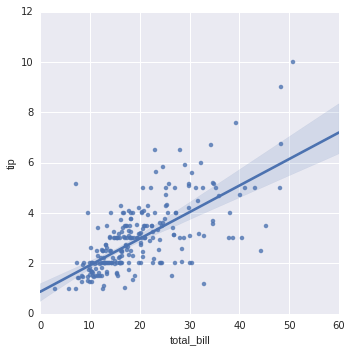

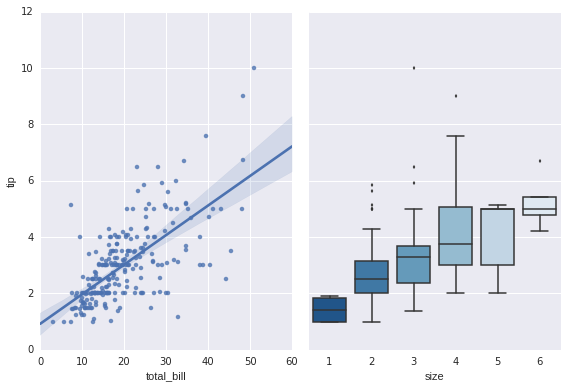

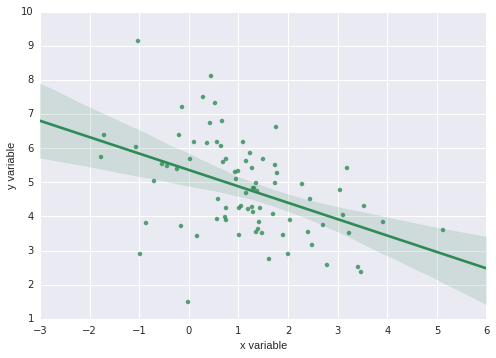

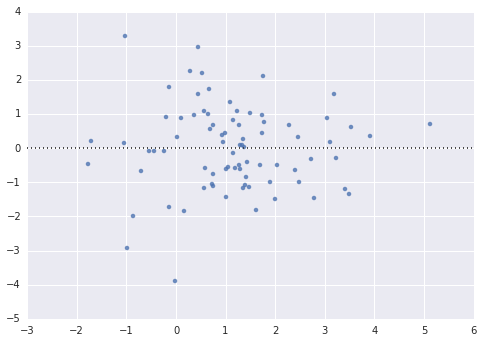

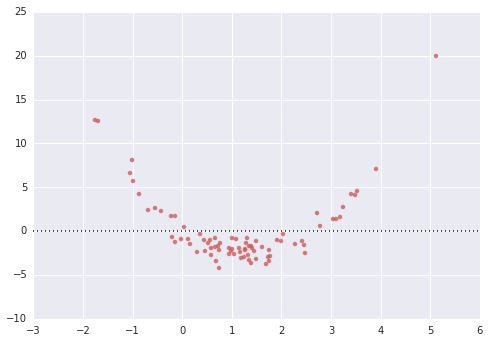

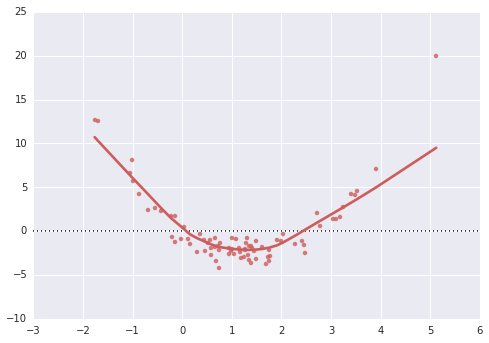

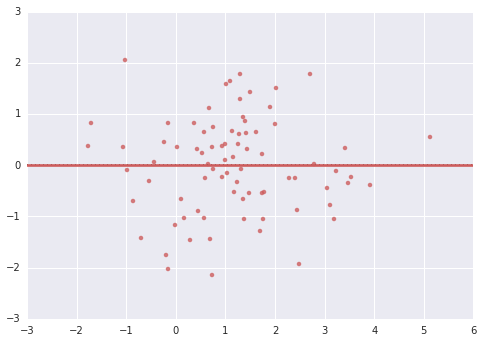

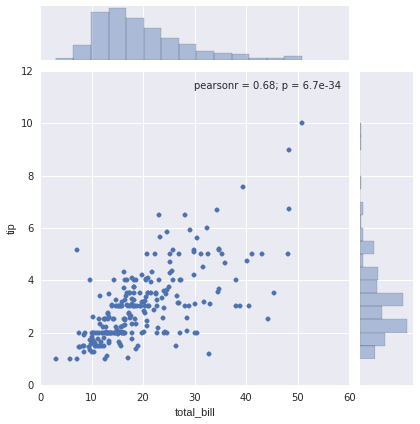

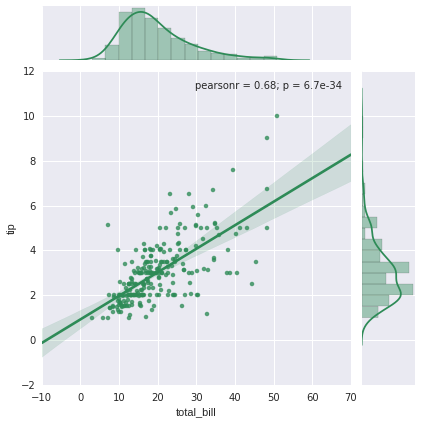

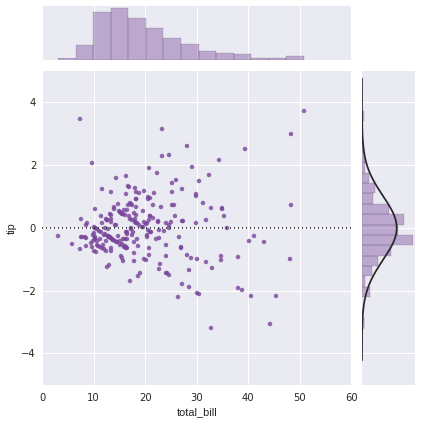

In [8]:
"""A guided walk through seaborn's linear regression visualisaton functions.

Don't run this script or just copy and paste blindly.  Copy each small
section, then think about what it does, try some variations, ask
questions if you want.
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn assumes pandas dataframes.
tips = sns.load_dataset("tips")

# Exercise:  Look at tips.

# Basic plotting.
sns.lmplot("total_bill", "tip", tips)
plt.show()
# The confidence interval here was 95%.  We can change that.
sns.lmplot("total_bill", "tip", tips, ci=68)
plt.show()

# Seaborn supports discrete predictors as well.
sns.lmplot("size", "tip", tips);
plt.show()

# Jitter is useful for visualizing.
sns.lmplot("size", "tip", tips, x_jitter=.15)
plt.show()

# Maybe want the central tendency of each bin: use the x_estimator
# argument.  The estimator will be bootstrapped and a confidence
# interval will be plotted – 95% by default.
sns.lmplot("size", "tip", tips, x_estimator=np.mean)
plt.show()

# Exercise:  Play with the x_bins option.  It can be an array
# (explicit binning) or an int (number of bins).

# Hues let you see categorical data in different colors.
sns.lmplot("total_bill", "tip", tips, hue="smoker");
plt.show()

# Variant when color isn't enough.
sns.lmplot("total_bill", "tip", tips, hue="smoker", markers=["x", "o"]);
plt.show()

# Use columns instead of colors (changes emphasis).
sns.lmplot("total_bill", "tip", tips, col="smoker")
plt.show()

# Both color and columns.
sns.lmplot("total_bill", "tip", tips, col="smoker", hue="smoker")
plt.show()

# Go wild.  (Note:  This is kinda bad.)
g = sns.lmplot("total_bill", "tip", tips, hue="day", palette="Set2",
               hue_order=["Thur", "Fri", "Sat", "Sun"])
g.set_axis_labels("Total bill (US Dollars)", "Tip");
g.set(xticks=[10, 30, 50], ylim=(0, 10), yticks=[0, 2.5, 5, 7.5, 10]);
plt.show()

# No regression line.
sns.lmplot("total_bill", "tip", tips, hue="time", palette="Set1", fit_reg=False);
plt.show()

# Non-linear models.
sns.lmplot("size", "total_bill", tips, order=2)
plt.show()

# Logistic regression.
tips["big_tip"] = (tips["tip"] / tips["total_bill"]) > .15
sns.lmplot("total_bill", "big_tip", tips, y_jitter=.05)
plt.show()
sns.lmplot("total_bill", "big_tip", tips, y_jitter=.05, logistic=True)
plt.show()
# Exercise:  How separable are these sets really?

# Can bootstrap to try to be robust against outliers.
sns.lmplot("total_bill", "tip", tips, robust=True, n_boot=500)
plt.show()

# lmplot uses regplot, which is accessible directly when needed.
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.regplot("total_bill", "tip", tips, ax=ax1)
sns.boxplot(tips["tip"], tips["size"], color="Blues_r", ax=ax2).set_ylabel("")
f.tight_layout()
plt.show()

# regplot also accepts numpy arrays.
x, y = np.random.multivariate_normal([1, 5], [(2, -.8), (-.8, 2)], 80).T
ax = sns.regplot(x, y, color="seagreen")
ax.set(xlabel="x variable", ylabel="y variable")
plt.show()

# The validity of linear regression depends, among other things, on
# the residuals being reasonable (normally distributed, etc.).
#
# With seaborn, we can view the residuals directly.
sns.residplot(x, y);
plt.show()

# Look at non-linear residuals.
y = x + 1.5 * x ** 2 + np.random.randn(len(x))
sns.residplot(x, y, color="indianred")
plt.show()

# Fit a Lowess curve to the residuals.
sns.residplot(x, y, color="indianred", lowess=True)
plt.show()

# Check if a second order model might work.
sns.residplot(x, y, color="indianred", order=2, lowess=True)
plt.show()

# Plot marginal distributions.
sns.jointplot("total_bill", "tip", tips)
plt.show()

# With regression.
sns.jointplot("total_bill", "tip", tips, kind="reg", color="seagreen")
plt.show()

# Residuals.
sns.jointplot("total_bill", "tip", tips, kind="resid", color="#774499");
plt.show()

# Cross validation

Demonstrate cross validation and how we might
measure it.

And in discussion: how cross validation works, the importance of
not validating on training data, and OVR (OVA) vs one-on-one.

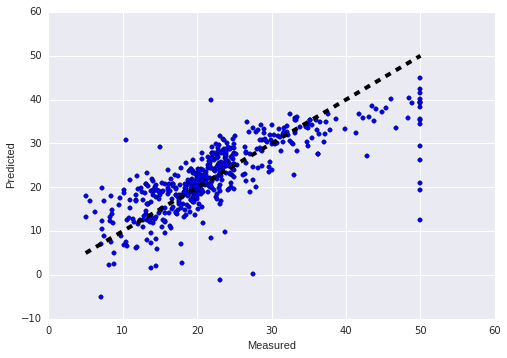

In [9]:
"""
====================================
Plotting Cross-Validated Predictions
====================================

This example shows how to use `cross_val_predict` to visualize prediction
errors.

"""
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig,ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')


# Under and Over Fitting

Demonstrate under and over fitting.


Underfitting vs. Overfitting

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes

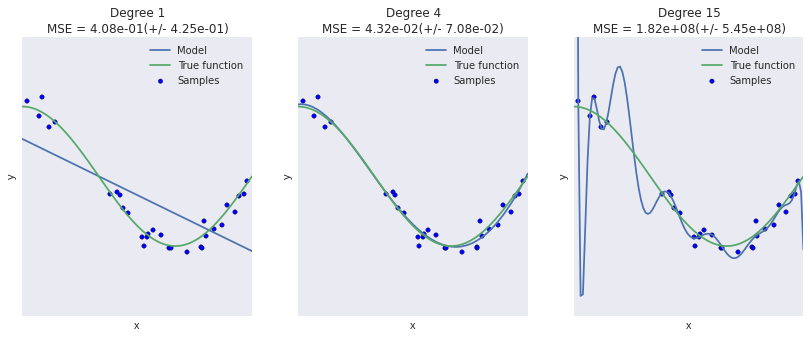

In [10]:
"""
============================
Underfitting vs. Overfitting
============================

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively **overfitting** / **underfitting** by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.
"""

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
